In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
df_train = pd.read_csv('data/train.csv')
df_train.head(12)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
(df_train.isna()['Fence'] == True).sum()

1179

In [22]:
df_train.isna().head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [23]:
df_train['Id'].dtype

dtype('int64')

In [24]:
df_train['Fence'].isna().sum()

1179

In [25]:
print('df_train.Fence {} ***** df_train[\'Fence\']  {}'.format(type(df_train.Fence), type(df_train['Fence'])))

df_train.Fence <class 'pandas.core.series.Series'> ***** df_train['Fence']  <class 'pandas.core.series.Series'>


In [9]:
df_train.Fence.isna().sum()

1179

In [26]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
print("{} and this is the type {}".format(df_train.columns[2:4], type(df_train.columns)))


Index(['MSZoning', 'LotFrontage'], dtype='object') and this is the type <class 'pandas.core.indexes.base.Index'>


In [28]:
df_train.columns[2]


'MSZoning'

Here there is a reference to this function [Python sorted function](https://docs.python.org/3/howto/sorting.html) 


Paper reference for Categorical Data [Towards Data Science](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159)

# Features ordered by Not Available values

In [29]:
sorted([(feature, df_train[feature].isna().sum(), df_train[feature].dtype) for feature in df_train.columns], key = lambda item : item[1])

[('Id', 0, dtype('int64')),
 ('MSSubClass', 0, dtype('int64')),
 ('MSZoning', 0, dtype('O')),
 ('LotArea', 0, dtype('int64')),
 ('Street', 0, dtype('O')),
 ('LotShape', 0, dtype('O')),
 ('LandContour', 0, dtype('O')),
 ('Utilities', 0, dtype('O')),
 ('LotConfig', 0, dtype('O')),
 ('LandSlope', 0, dtype('O')),
 ('Neighborhood', 0, dtype('O')),
 ('Condition1', 0, dtype('O')),
 ('Condition2', 0, dtype('O')),
 ('BldgType', 0, dtype('O')),
 ('HouseStyle', 0, dtype('O')),
 ('OverallQual', 0, dtype('int64')),
 ('OverallCond', 0, dtype('int64')),
 ('YearBuilt', 0, dtype('int64')),
 ('YearRemodAdd', 0, dtype('int64')),
 ('RoofStyle', 0, dtype('O')),
 ('RoofMatl', 0, dtype('O')),
 ('Exterior1st', 0, dtype('O')),
 ('Exterior2nd', 0, dtype('O')),
 ('ExterQual', 0, dtype('O')),
 ('ExterCond', 0, dtype('O')),
 ('Foundation', 0, dtype('O')),
 ('BsmtFinSF1', 0, dtype('int64')),
 ('BsmtFinSF2', 0, dtype('int64')),
 ('BsmtUnfSF', 0, dtype('int64')),
 ('TotalBsmtSF', 0, dtype('int64')),
 ('Heating', 0, d

# Let's do EDA for categorical data

In [30]:
df_train.Alley.value_counts().dtype

dtype('int64')

In [31]:
type(df_train.Alley.value_counts())

pandas.core.series.Series

In [32]:
df_train['Alley'].value_counts() # Differents kind of values and frequency


Grvl    50
Pave    41
Name: Alley, dtype: int64

In [33]:
list(df_train['Alley'].value_counts().index)

['Grvl', 'Pave']

In [34]:
df_train['Alley'].dtype == 'int64'

False

In [35]:
print("{}     {}".format(df_train.Alley.dtype, df_train.Alley.value_counts().dtype))

object     int64


In [36]:
[(feature, list(df_train[feature].value_counts().index)) for feature in df_train.columns if df_train[feature].dtype == 'O']

[('MSZoning', ['RL', 'RM', 'FV', 'RH', 'C (all)']),
 ('Street', ['Pave', 'Grvl']),
 ('Alley', ['Grvl', 'Pave']),
 ('LotShape', ['Reg', 'IR1', 'IR2', 'IR3']),
 ('LandContour', ['Lvl', 'Bnk', 'HLS', 'Low']),
 ('Utilities', ['AllPub', 'NoSeWa']),
 ('LotConfig', ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3']),
 ('LandSlope', ['Gtl', 'Mod', 'Sev']),
 ('Neighborhood',
  ['NAmes',
   'CollgCr',
   'OldTown',
   'Edwards',
   'Somerst',
   'Gilbert',
   'NridgHt',
   'Sawyer',
   'NWAmes',
   'SawyerW',
   'BrkSide',
   'Crawfor',
   'Mitchel',
   'NoRidge',
   'Timber',
   'IDOTRR',
   'ClearCr',
   'SWISU',
   'StoneBr',
   'Blmngtn',
   'MeadowV',
   'BrDale',
   'Veenker',
   'NPkVill',
   'Blueste']),
 ('Condition1',
  ['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe']),
 ('Condition2',
  ['Norm', 'Feedr', 'RRNn', 'Artery', 'PosN', 'PosA', 'RRAn', 'RRAe']),
 ('BldgType', ['1Fam', 'TwnhsE', 'Duplex', 'Twnhs', '2fmCon']),
 ('HouseStyle',
  ['1Story',
   '2Story',
   

## Extracting the labels for categorical data

In [37]:
categorical_labels = [feature for feature in df_train.columns if df_train[feature].dtype == 'O']

In [38]:
len(categorical_labels)

43

In [39]:
df_train[categorical_labels].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [40]:
df_train[categorical_labels].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


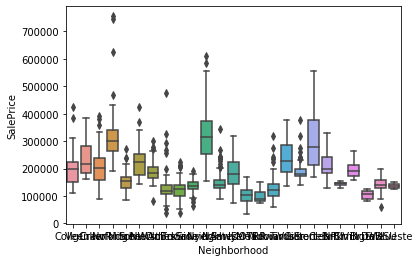

In [41]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train);

## Bloxplot ordered according to the Neighborhood median sale price

In [43]:
# Grouping values according to the neighborhood
grouped = df_train.groupby(['Neighborhood'])

In [44]:
[(neighborhood, features) for neighborhood, features in grouped]

[('Blmngtn',
          Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
  219    220         120       RL         43.0     3010   Pave   NaN      Reg   
  229    230         120       RL         43.0     3182   Pave   NaN      Reg   
  385    386         120       RL         43.0     3182   Pave   NaN      Reg   
  443    444         120       RL         53.0     3922   Pave   NaN      Reg   
  465    466         120       RM          NaN     3072   Pave   NaN      Reg   
  559    560         120       RL          NaN     3196   Pave   NaN      Reg   
  597    598         120       RL         53.0     3922   Pave   NaN      Reg   
  639    640         120       RL         53.0     3982   Pave   NaN      Reg   
  790    791         120       RL         43.0     3182   Pave   NaN      Reg   
  851    852         120       RL          NaN     3196   Pave   NaN      Reg   
  982    983          20       RL         43.0     3182   Pave   NaN      Reg   
  1004  1005   

In [50]:
grouped.get_group('NridgHt').SalePrice

11      345000
20      325300
25      256300
27      306000
34      277500
35      309000
45      319900
62      202500
65      317000
151     372402
161     412500
162     220000
167     325624
199     274900
224     386250
238     318000
278     415298
282     207500
309     360000
320     342643
321     354000
332     284000
333     207000
343     266000
348     154000
349     437154
350     318061
389     426000
408     280000
440     555000
         ...  
689     194700
707     254000
753     275500
774     395000
798     485000
803     582933
819     224000
825     385000
877     350000
898     611657
926     285000
971     173000
987     395192
994     337500
1042    196000
1056    185850
1058    335000
1109    280000
1115    318000
1157    230000
1165    233170
1228    367294
1236    175500
1243    465000
1251    171750
1289    281000
1305    325000
1306    202500
1359    315000
1437    394617
Name: SalePrice, Length: 77, dtype: int64

In [51]:
grouped.get_group('NridgHt').SalePrice.mean()

316270.6233766234

In [52]:
grouped.get_group('NridgHt').SalePrice.median()

315000.0

In [53]:
df_neighborhood = pd.DataFrame({neighborhood:grouped.get_group(neighborhood).SalePrice for neighborhood,features in grouped})

In [54]:
df_neighborhood.head(15)

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,NaN,NaN,NaN,NaN,NaN,208500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181500.0
2,NaN,NaN,NaN,NaN,NaN,223500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,140000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,307000.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,129900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,118000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_neighborhood.median()

Blmngtn    191000.0
Blueste    137500.0
BrDale     106000.0
BrkSide    124300.0
ClearCr    200250.0
CollgCr    197200.0
Crawfor    200624.0
Edwards    121750.0
Gilbert    181000.0
IDOTRR     103000.0
MeadowV     88000.0
Mitchel    153500.0
NAmes      140000.0
NPkVill    146000.0
NWAmes     182900.0
NoRidge    301500.0
NridgHt    315000.0
OldTown    119000.0
SWISU      139500.0
Sawyer     135000.0
SawyerW    179900.0
Somerst    225500.0
StoneBr    278000.0
Timber     228475.0
Veenker    218000.0
dtype: float64

In [55]:
df_neighborhood.median().sort_values(axis='index', ascending=True, inplace=False) # 0 or index means along 

MeadowV     88000.0
IDOTRR     103000.0
BrDale     106000.0
OldTown    119000.0
Edwards    121750.0
BrkSide    124300.0
Sawyer     135000.0
Blueste    137500.0
SWISU      139500.0
NAmes      140000.0
NPkVill    146000.0
Mitchel    153500.0
SawyerW    179900.0
Gilbert    181000.0
NWAmes     182900.0
Blmngtn    191000.0
CollgCr    197200.0
ClearCr    200250.0
Crawfor    200624.0
Veenker    218000.0
Somerst    225500.0
Timber     228475.0
StoneBr    278000.0
NoRidge    301500.0
NridgHt    315000.0
dtype: float64

In [56]:
sorted_index = df_neighborhood.median().sort_values(axis='index', ascending=True, inplace=False).index

In [57]:
type(sorted_index)

pandas.core.indexes.base.Index

In [58]:
sorted_index[:6]

Index(['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'Edwards', 'BrkSide'], dtype='object')

In [59]:
df_neighborhood = df_neighborhood[sorted_index]

In [61]:
df_neighborhood.head(15)

,MeadowV,IDOTRR,BrDale,OldTown,Edwards,BrkSide,Sawyer,Blueste,SWISU,NAmes,...,Blmngtn,CollgCr,ClearCr,Crawfor,Veenker,Somerst,Timber,StoneBr,NoRidge,NridgHt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,208500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,181500.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,223500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,140000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,307000.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,129900.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,118000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


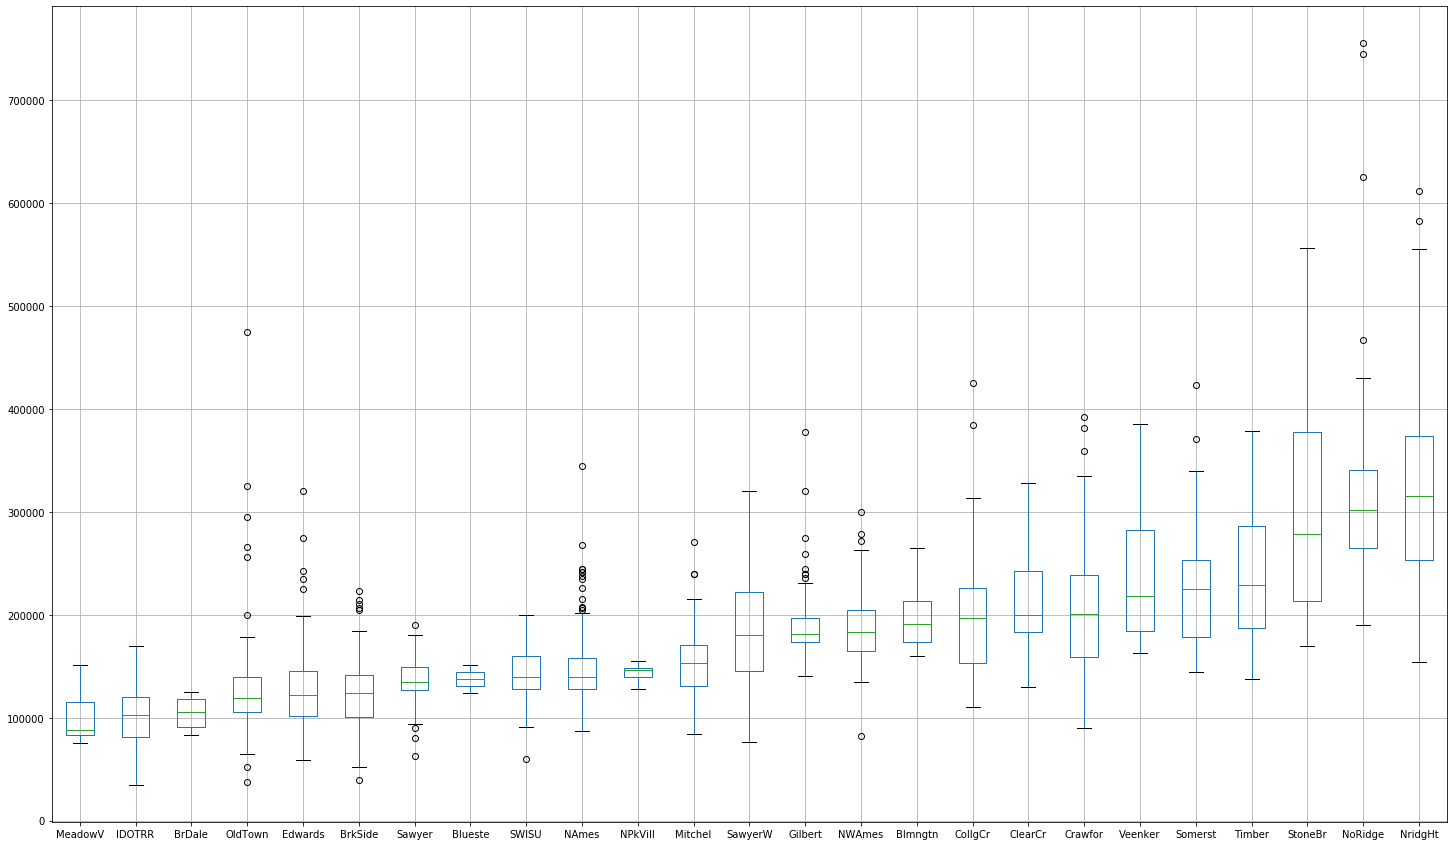

In [66]:
fig, ax = plt.subplots(figsize=(25,15))
df_neighborhood.boxplot()

In [2]:
df_neighborhood

NameError: name 'df_neighborhood' is not defined